### Exercise 24: PCA
We can start with some simple 2D data that are easy to visualize, then we can do a larger dimensional dataset.

In [23]:
import numpy as np
import matplotlib.pyplot as plt

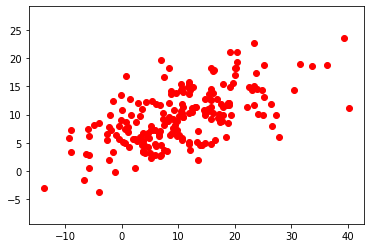

In [9]:
mu = np.array([10,10])
cov = np.array([[100,30],[30,25]])

X = np.random.multivariate_normal(mu,cov,200)

plt.plot(X[:,0],X[:,1],'ro')
plt.axis('equal')
plt.show()

In [12]:
# Find the principal component analysis
m = X.shape[0]
sample_mean = X.mean(axis=0, keepdims = True)
sample_covariance = 1/m * (X - sample_mean).T@(X - sample_mean)

In [14]:
# Take Eigenvectors/eigemvalues
w,v = np.linalg.eig(sample_covariance)
print(w)
print(v)

[100.25745365  14.04857974]
[[ 0.9371563  -0.34890984]
 [ 0.34890984  0.9371563 ]]


In [15]:
v[:,0]@v[:,1]

0.0

In [16]:
w1 = v[:,0]
w2 = v[:,1]

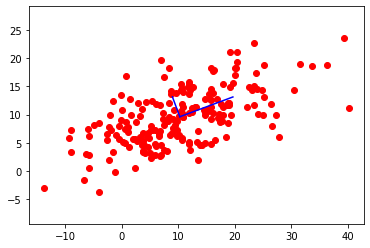

In [20]:
plt.plot(X[:,0],X[:,1],'ro')
# Major axis of the data (eigenvector 1)
plt.plot([sample_mean[0,0],sample_mean[0,0]+w1[0]*np.sqrt(w[0])],[sample_mean[0,1],sample_mean[0,1]+w1[1]*np.sqrt(w[0])],'b-')
# Major axis of the data (eigenvector 2)
plt.plot([sample_mean[0,0],sample_mean[0,0]+w2[0]*np.sqrt(w[1])],[sample_mean[0,1],sample_mean[0,1]+w2[1]*np.sqrt(w[1])],'b-')

plt.axis('equal')
plt.show()

In [25]:
# Compress data by projecting onto w1
projection = w1.reshape(1,2) @ (X - sample_mean).T
np.std(projection)**2

100.25745365197663

### Real data: movie ratings

In [1]:
import pandas as pd

In [3]:
# Load movies names and ratings
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
ratings.drop(['timestamp'],axis=1,inplace=True)

In [5]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [6]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
# Transform into one dataset

def replace_name(x):
    return movies[movies['movieId']==x].title.values[0]

In [ ]:
ratings.movieId = ratings.movieId.map(replace_name)

In [ ]:
ratings.head()

,userId,movieId,rating
0,1,Toy Story (1995),4.0
1,1,Grumpier Old Men (1995),4.0
2,1,Heat (1995),4.0
3,1,Seven (a.k.a. Se7en) (1995),5.0
4,1,"Usual Suspects, The (1995)",5.0


In [20]:
M = ratings.pivot_table(index=['userId'],columns=['movieId'],values='rating')

In [21]:
m = M.shape
m

(610, 9719)

In [25]:
df1 = M.replace(np.nan,0,regex = True)
df1.head()

movieId,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Normalize the data using standardization
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df1)

In [32]:
X_std.shape

(610, 9719)

In [33]:
X_std.std(axis=0)

array([1., 1., 1., ..., 1., 1., 1.])

In [35]:
# Find the principal component analysis
sample_mean = X_std.mean(axis=0, keepdims = True)
sample_covariance =1/m[0]*(X_std - sample_mean).T@(X_std - sample_mean)

In [36]:
sample_covariance.shape

(9719, 9719)

In [37]:
# Take Eigenvectors/eigemvalues
eig_vals,eig_vecs = np.linalg.eig(sample_covariance)

In [ ]:
#sample_covariance = (X_std - sample_mean)@(X_std - sample_mean).T 

In [38]:
eig_vals

array([ 6.93495992e+02+0.j,  4.86421966e+02+0.j,  4.38269295e+02+0.j, ...,
        3.93118930e-38+0.j,  1.80985375e-48+0.j, -8.03529811e-49+0.j])

In [41]:
eig_vecs[:,0]

array([-6.17879786e-03+0.j, -1.37389338e-04+0.j,  3.98116838e-05+0.j, ...,
       -5.71402600e-03+0.j, -1.45210348e-02+0.j, -3.15495954e-05+0.j])

In [42]:
eig_vecs[:,0].argmax()

1864

In [44]:
eig_vecs[1864,0]

(0.0008821223534915584+0j)

In [45]:
eig_vecs[:,0].argsort()

array([3385, 9556, 7481, ..., 4333,  242, 1864])

In [46]:
eig_vecs[:,1].argsort()

array([6625, 2054, 2438, ..., 6082, 1351, 1504])

In [48]:
movies.iloc[2054]

movieId                        2733
title                  Vibes (1988)
genres     Adventure|Comedy|Romance
Name: 2054, dtype: object